# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [373]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [374]:
import warnings
warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [375]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [376]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
df = pd.read_csv('/content/drive/My Drive/foodhub/foodhub_order.csv')
backup_df = df.copy()

In [378]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [379]:
df.shape

(1898, 9)

#### Observations: The dataset contains 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The dataset contains 4 columns with int64 datatype, 1 column with float64 datatype, and 4 columns with object datatype.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [381]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: Based on the data provided, there are no missing values in the dataset, as indicated by all columns having zero missing entries.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [382]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: Based on the statistical summary of the data, the minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20.00 minutes, 27.37 minutes, and 35.00 minutes, respectively.


### **Question 5:** How many orders are not rated? [1 mark]

In [383]:
not_rated = df['rating'].value_counts().get('Not given',0)
not_rated

736

#### Observations: There are 736 orders that are not rated.


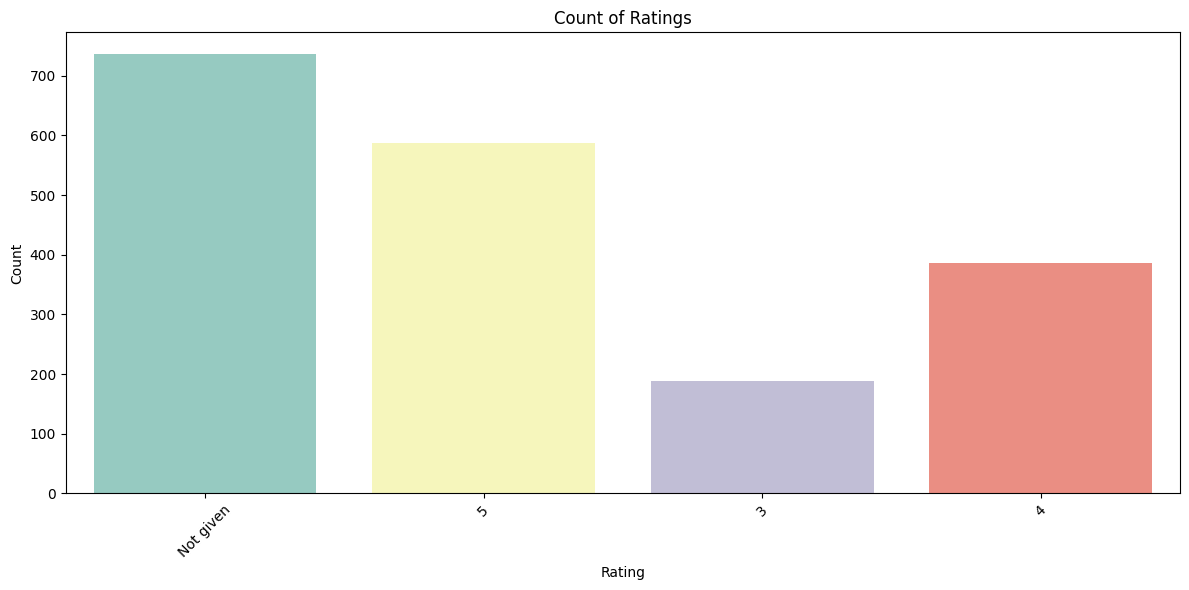

In [384]:
# Plot count of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=backup_df, x='rating', palette='Set3')  # Create countplot using seaborn
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Top Customers by Number of Orders in the Dataset

In [385]:
# Orders made by individual customers
cnt = df['customer_id'].value_counts()
cnt

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations: The dataset reveals a significant variation in customer engagement, with a few highly active customers, such as customer_id 52832 having 13 interactions, and the majority having minimal activity, with many customers having only 1 interaction.

# Top 10 Customer IDs by Count

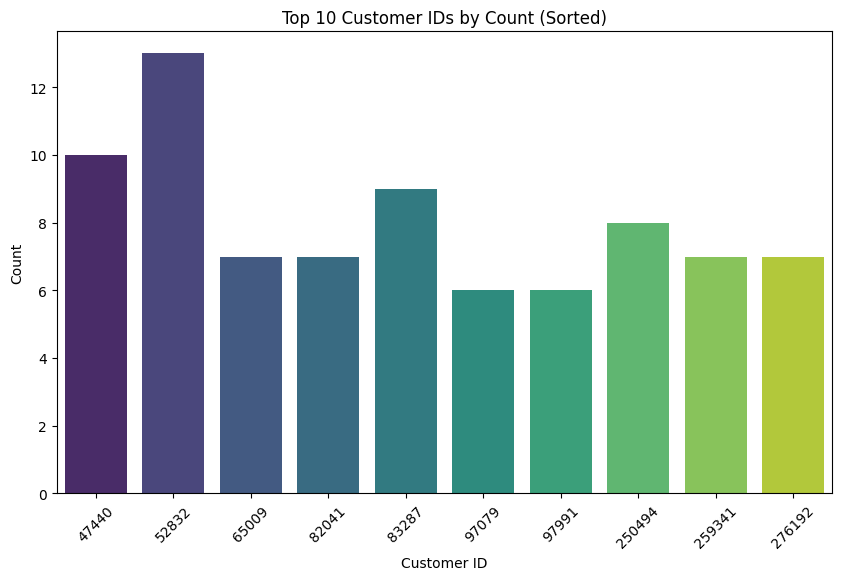

In [386]:
# Plot top 10 customer by count
cnt = backup_df['customer_id'].value_counts()

# Select the top 10 customer_ids
top_10_customers = cnt.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette='viridis')
plt.title('Top 10 Customer IDs by Count (Sorted)')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Summary of Food Delivery Dataset Statistics



In [387]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations: The dataset includes information on 1898 orders from 1200 different customers across 178 restaurants. Each order features cuisine from 14 types, costs up to 312 units, and spans 2 days. Orders are rated on a scale of 1 to 4, with food prep times from 1 to 16 units and delivery times up to 19 units, offering insights into customer choices, restaurant performance, and operational efficiency in food delivery.

# Plot of number of unique count per column in the foodhub_order dataset

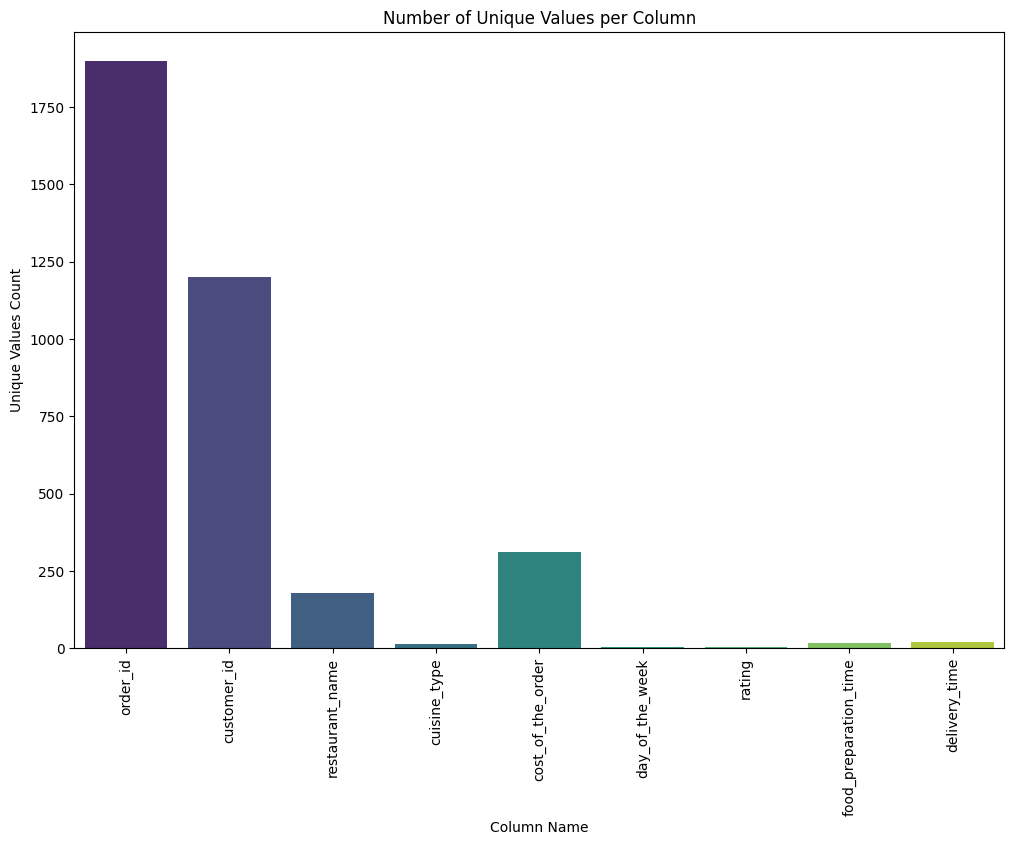

In [388]:
unique_counts = backup_df.nunique()

# Plotting number of unique count per column in the foodhub_order dataset
plt.figure(figsize=(12, 8))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')
plt.title('Number of Unique Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Unique Values Count')
plt.xticks(rotation=90)
plt.show()

# Top 10 Most Frequented Restaurants: A Snapshot of Popular Dining Choices

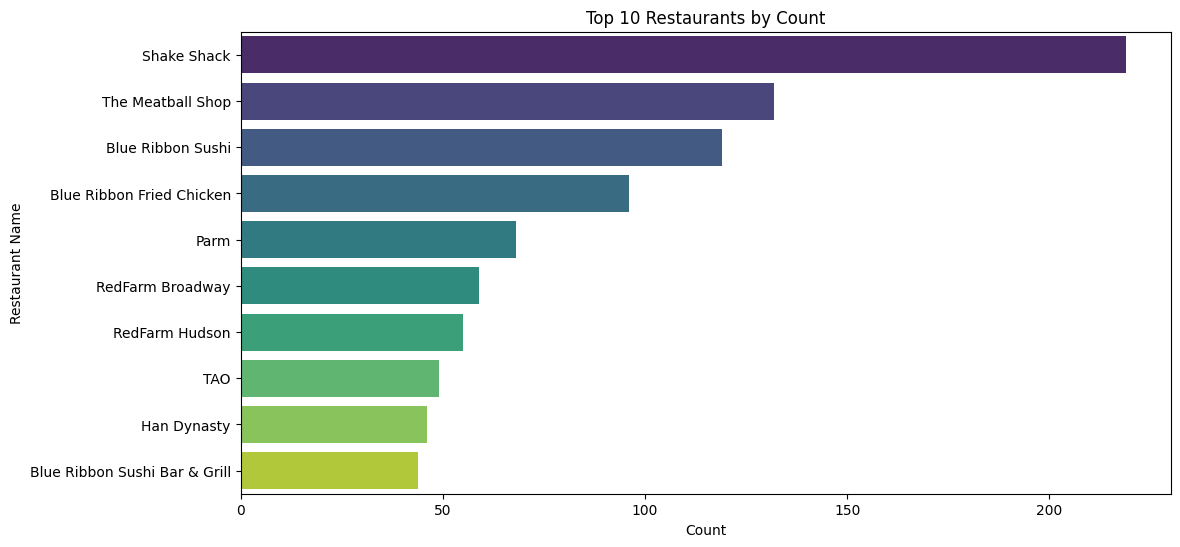

In [389]:
# Plot top 10 resturant by count
top_10_restaurants = df['restaurant_name'].value_counts().nlargest(10).index
filtered_df = df[df['restaurant_name'].isin(top_10_restaurants)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='restaurant_name', order=top_10_restaurants, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Count')
plt.show()

In [390]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations: The distribution of reviews among restaurants is highly skewed, with a few popular establishments like Shake Shack receiving significantly more reviews (219) compared to others, which have much lower review counts, some as low as 1 review. This indicates varying levels of popularity and customer engagement across different dining venues.

# Top 10 Cusine by Frequency Based on High Customer Ratings (>= 4)

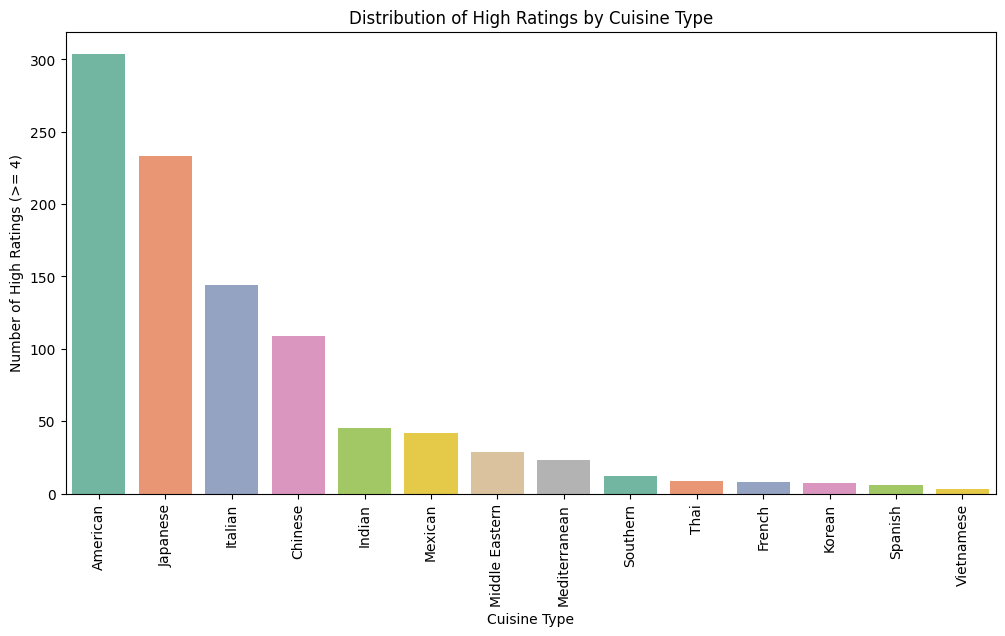

In [391]:
# Plot distribution of ratings by cusing type
data = df[df['rating'] != 'Not given']
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
high_rating_data = data[data['rating'] >= 4]

plt.figure(figsize=(12, 6))
sns.countplot(data=high_rating_data, x='cuisine_type', palette='Set2', order=high_rating_data['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of High Ratings (>= 4)')
plt.title('Distribution of High Ratings by Cuisine Type')
plt.show()

#### Observations: American cuisine has the highest number of high ratings (ratings >= 4) with a count of 300. Japanese cuisine follows with 245 high ratings. Italian cuisine has 140 high ratings. Chinese cuisine has 120 high ratings and Indian cusine has 50 ratings. All other cuisine types have fewer than 50 high ratings.

In [392]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

#### Observations: American cuisine is the most represented in the dataset with 584 restaurants, followed by Japanese cuisine with 470 restaurants. This indicates a strong presence of American and Japanese cuisines compared to others in the dataset.

# Boxplot of Cost of the Order Showing the Distribution and Outliers

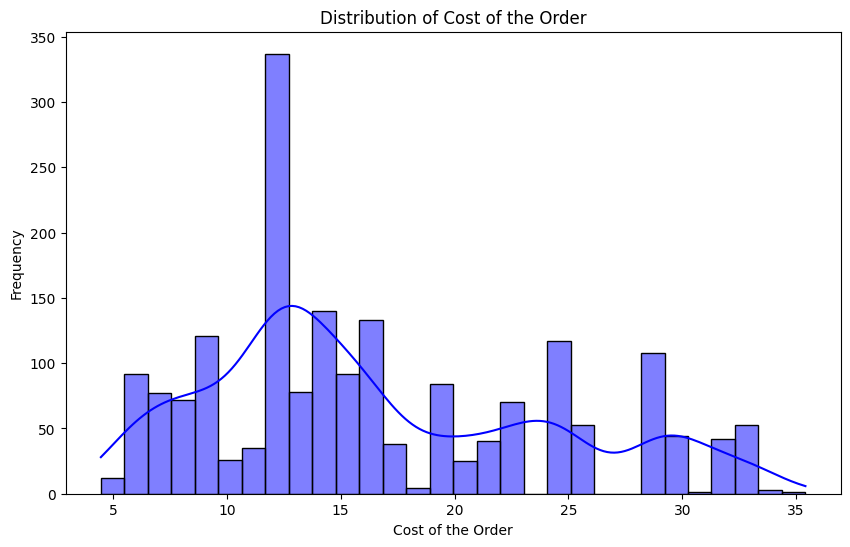

In [393]:
# Plot distribution of cost of the order column
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, bins=30, color='blue')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()

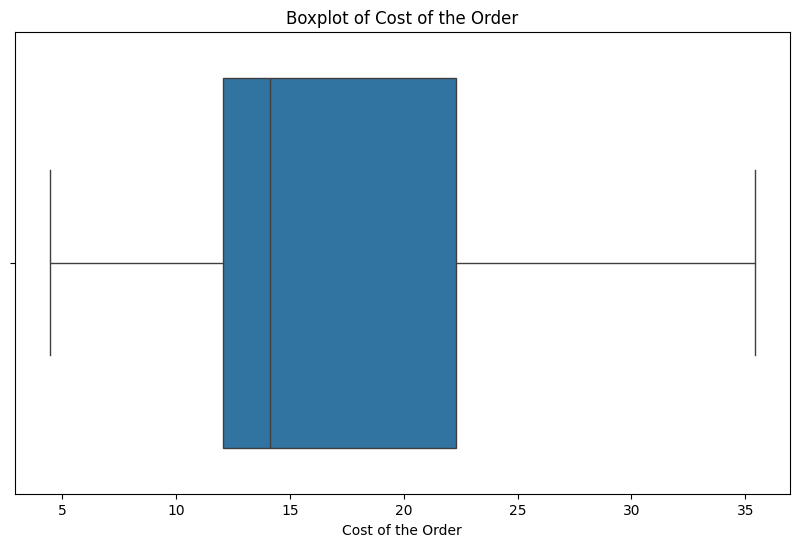

In [394]:
# Plot cost of the order column using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cost_of_the_order'])
plt.xlabel('Cost of the Order')
plt.title('Boxplot of Cost of the Order')
plt.show()

#### Observations: The distribution of the cost of orders exhibits a range from a minimum of 4.47 to a maximum of 35.41, with a median value of 14.14. The first quartile (Q1) is positioned at 12.08 and the third quartile (Q3) at 22.29, indicating a skewed distribution towards higher cost orders.

# Calculation of min,max, Q1, and Q3 of cost of the order

In [395]:
min, max =  df['cost_of_the_order'].min(), df['cost_of_the_order'].max()
min, max

(4.47, 35.41)

In [396]:
cost_of_the_order = df['cost_of_the_order'].quantile([0.25, 0.5, 0.75])
cost_of_the_order

0.25    12.0800
0.50    14.1400
0.75    22.2975
Name: cost_of_the_order, dtype: float64

In [397]:
df['cost_of_the_order'].value_counts()

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: count, Length: 312, dtype: int64

#### Observations: The data shows a distribution of costs for orders, with the highest count of 86 orders having a cost of 12.18. This suggests that $12.18 is a common price point for orders in the dataset, potentially indicating a popular price tier among customers or a significant product category within the dataset.

# Frequency of Orders Across Restaurants on Weekends vs. Weekdays

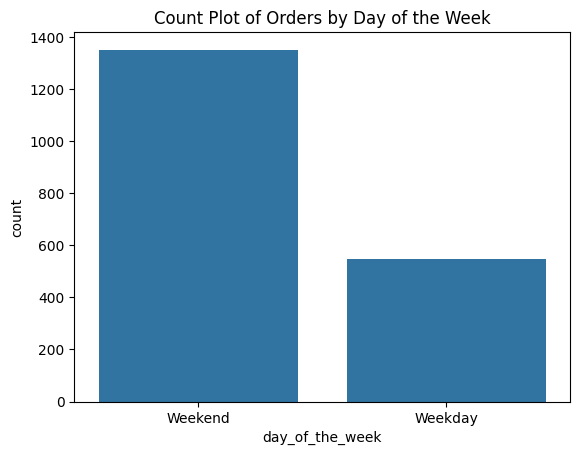

In [398]:
# Plot number of orders by weekend and weekday
sns.countplot(data=df, x='day_of_the_week')
plt.title('Count Plot of Orders by Day of the Week')
plt.show()

#### Observations: The count plot reveals a significant disparity in the number of orders between weekdays and weekends, with 1350 orders occurring on weekends compared to only 550 orders during weekdays. This indicates that the business experiences higher demand during weekends, likely due to customers preferring to order food during their leisure time.

# Order Distribution by Day of the Week

In [399]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

#### Observations: The data shows a significant disparity in counts between weekends and weekdays. Specifically, there are 1351 occurrences recorded during weekends compared to 547 occurrences during weekdays. This suggests that the events or activities being counted are more frequent during weekends than weekdays, highlighting a potential pattern in the data based on the day of the week.

# Analysis of Customer Ratings Across Orders

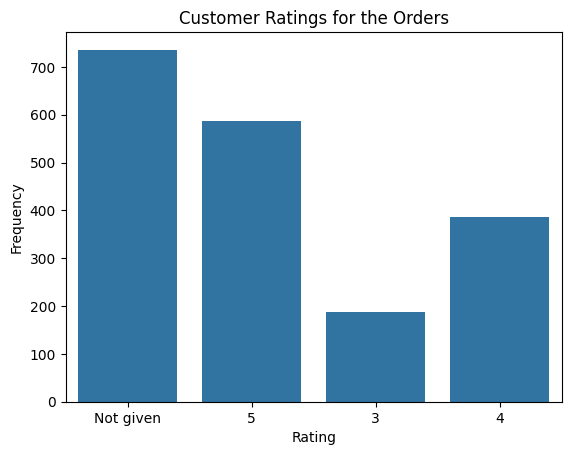

In [400]:
# Plot customer ratings on the orders
sns.countplot(data=df, x='rating')
plt.title('Customer Ratings for the Orders')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Observations: The countplot of ratings shows that the most common rating is 5 (588), followed by 4 (386) and 3 (188), indicating that most customers rate the cuisine highly. This suggests that the majority of customers are satisfied with the cuisine. To further improve customer satisfaction, the focus should be on understanding and addressing the reasons behind the lower ratings (3), ensuring consistent quality, and enhancing aspects that could elevate the overall dining experience.

# Rating Distribution Summary

In [401]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations: The majority of ratings for the dataset are concentrated in the higher range, with 5.0 ratings being the most frequent at 588 counts, followed by 4.0 ratings at 386 counts. This indicates that the dataset generally contains positively rated entries, suggesting a tendency towards favorable evaluations from users. The lower count of 3.0 ratings at 188 suggests a comparatively smaller occurrence of average or neutral ratings within the dataset.

# Variation in Food Preparation Time Across Restaurants

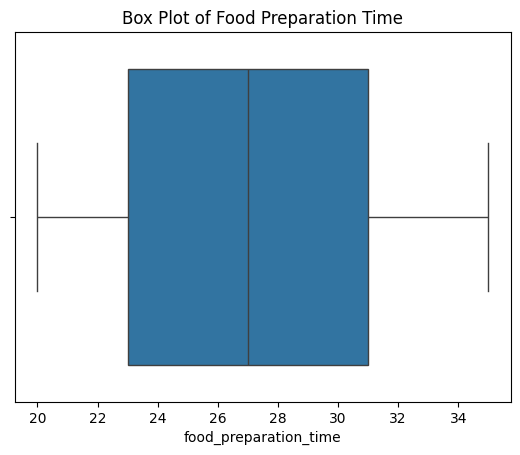

In [402]:
# Plot food preparation time
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Box Plot of Food Preparation Time')
plt.show()

# Food Preparation Time Distribution Analysis

In [403]:
df['food_preparation_time'].value_counts()

food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: count, dtype: int64

#### Observations: The food preparation times vary, with the shortest time being 109 minutes and the longest 135 minutes. Interestingly, there are multiple instances where different preparation times result in the same duration, such as 123 minutes occurring for three distinct preparations.

# Variation in Food Delivery Times Across Restaurants

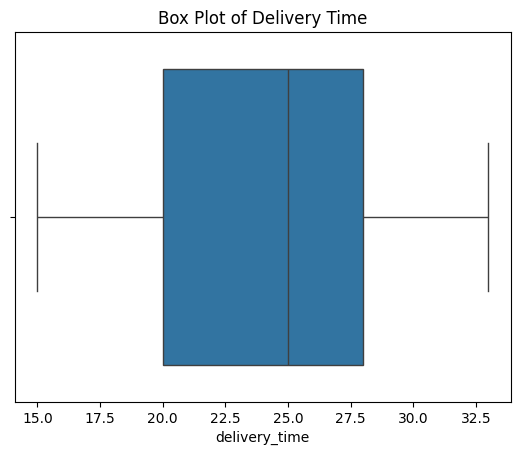

In [404]:
# Plot box plot of food delivery time
sns.boxplot(data=df, x='delivery_time')
plt.title('Box Plot of Delivery Time')
plt.show()

#### Observations: The boxplot illustrates a delivery time range from a minimum of 15 to a maximum of 33 minutes. The median delivery time is 25.0 minutes, with the first quartile (Q1) at 20.0 minutes and the third quartile (Q3) at 28.0 minutes, indicating that most delivery times are concentrated between Q1 and Q3.

# Summary Statistics of Delivery Times

In [405]:
# min and max calculation of food delivery time
min,max = df['delivery_time'].min(), df['delivery_time'].max()
print(f"Min: {min} - Max: {max}")


Min: 15 - Max: 33


In [406]:
# median, Q1 and Q3 calculation of food delivery time
median = np.median(df['delivery_time'])
Q1 = np.percentile(df['delivery_time'], 25)
Q3 = np.percentile(df['delivery_time'], 75)

print(f"Median: {median}, Q1: {Q1}, Q3: {Q3}")

Median: 25.0, Q1: 20.0, Q3: 28.0


# Frequency Distribution of Delivery Times

In [407]:
df['delivery_time'].value_counts()

delivery_time
24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64

#### Observations: The data shows a distribution of delivery times, where the most common delivery times are around 24, 28, and 29 minutes, each occurring approximately 148 times. As the delivery times increase or decrease from this range, the frequency gradually decreases, indicating a typical pattern in the distribution of delivery durations.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [408]:
# Top Restaurants by Order Count
restaurant_order_counts = df['restaurant_name'].value_counts().head(5)
restaurant_order_counts

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received are:
1.   Shake Shack: 219 orders
2.   The Meatball Shop: 132 orders
3.   Blue Ribbon Sushi: 119 orders
4.   Blue Ribbon Fried Chicken: 96 orders
5.   Parm: 68 orders

Shake Shack leads with the highest number of orders, followed by The Meatball Shop and Blue Ribbon Sushi, reflecting diverse customer preferences and popular dining choices among the top 5 restaurants.





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [409]:
# Count of Orders by Cuisine Type
df_weekend_cusine = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine = df_weekend_cusine['cuisine_type'].value_counts().head(5)
popular_cuisine

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:

Based on the provided data, the most popular cuisine on weekends is American cuisine, with 415 orders. Here are some key points:

1.  American Cuisine Dominance: American cuisine is significantly more popular on weekends compared to other types, with a total of 415 orders.
2.  Japanese Cuisine: The second most popular cuisine is Japanese, with 335 orders, indicating a strong preference but still trailing behind American cuisine by 80 orders.
3.  Italian and Chinese Cuisines: Italian and Chinese cuisines follow, with 207 and 163 orders respectively, showing moderate popularity.
4.  Least Popular: Mexican cuisine is the least popular among the listed cuisines on weekends, with only 53 orders.


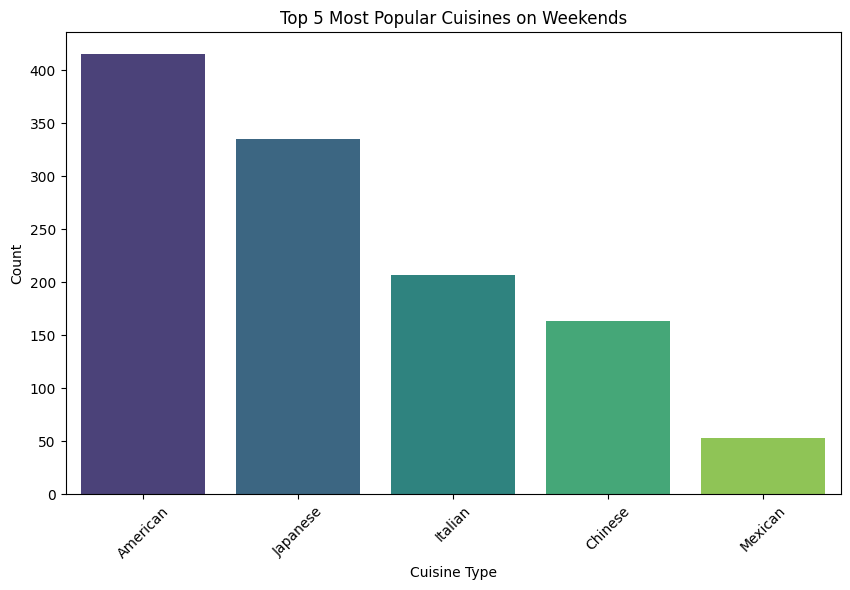

In [410]:
# Plot top 5 popular cusines on weekends
df_weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine = df_weekend_cuisine['cuisine_type'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_cuisine.index, y=popular_cuisine.values, palette='viridis')
plt.title('Top 5 Most Popular Cuisines on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [411]:
# percentage of the orders cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage = (orders_above_20.shape[0] / df.shape[0]) * 100
round(percentage,2)

29.24

#### Observations: Based on the analysis, it is observed that 29.24% of the orders cost more than 20 dollars. This indicates that nearly one-third of the orders fall into a higher price range, suggesting that a significant portion of customers are willing to spend more than 20 dollars on their orders. This insight can be useful for strategic pricing, marketing, and promotional decisions to target and retain high-spending customers.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [412]:
# mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
round(mean_delivery_time,2)

24.16

#### Observations: The mean order delivery time of 24.16 units provides a useful metric for evaluating and improving delivery operations, managing customer expectations, and optimizing resource allocation.

# Distribution of food Delivery Times

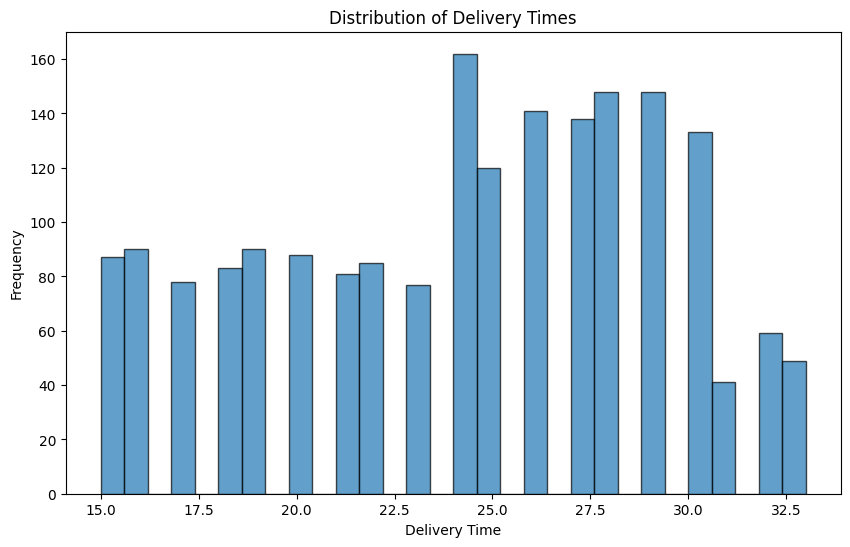

In [413]:
# Plot histogram of delivery times
mean_delivery_time = df['delivery_time'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['delivery_time'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [414]:
# Customer Order Counts
top_customers = df['customer_id'].value_counts().head(3)
top_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: The company’s initiative to offer 20% discount vouchers to the top 3 most frequent customers (IDs: 52832, 47440, and 83287) is a strategic move to reward customer loyalty and potentially boost future sales.

# Plot of Top 3 customer Order Counts


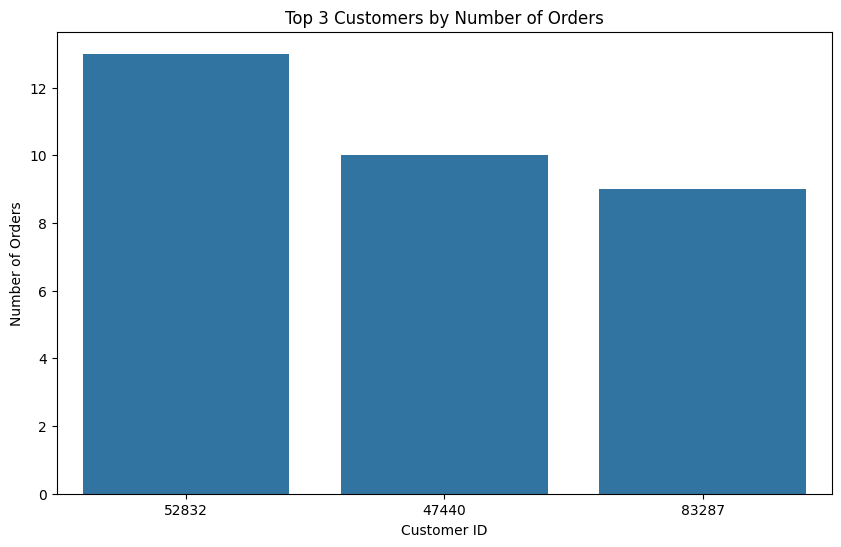

In [415]:
# Plot the top customers using seaborn countplot
top_customers = df['customer_id'].value_counts().head(3)

plt.figure(figsize=(10, 6))
sns.countplot(x='customer_id', data=df, order=top_customers.index)
plt.title('Top 3 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# Total Revenue by Cuisine Type

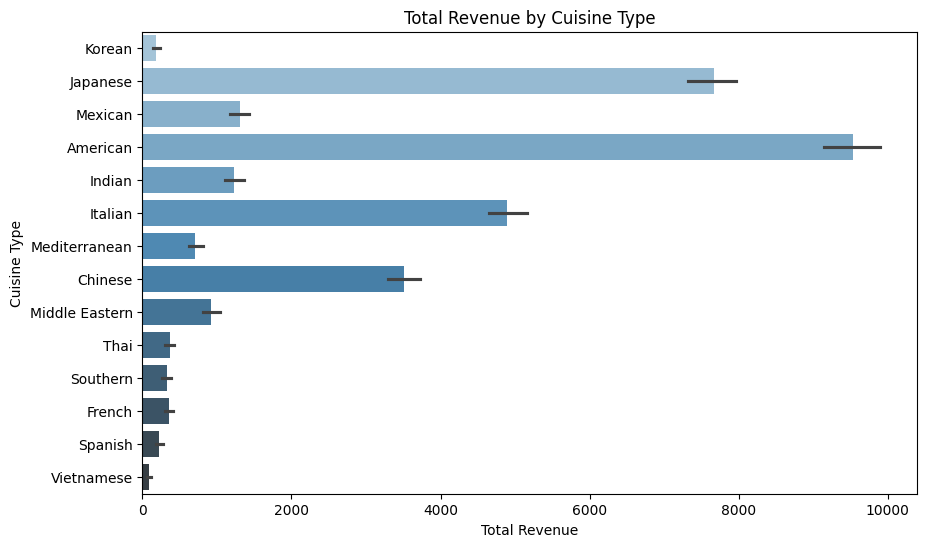

In [416]:
# Plot bar plot of total revenue by cusine type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cost_of_the_order', y='cuisine_type', estimator='sum', palette='Blues_d')
plt.xlabel('Total Revenue')
plt.ylabel('Cuisine Type')
plt.title('Total Revenue by Cuisine Type')
plt.show()

#### Observations:

The bar plot indicates that among the different cuisine types:

1.  American Cuisine: Has generated the highest total cost of orders, suggesting it is the most popular or most frequently ordered cuisine in the dataset.
2.  Japanese Cuisine: Comes in second, with a substantial but lower total cost of orders compared to American cuisine.
3.  Italian Cuisine: Is the third highest, indicating a significant but lesser popularity compared to American and Japanese cuisines.1.

# Correlation Heatmap for Food Hub Metrics

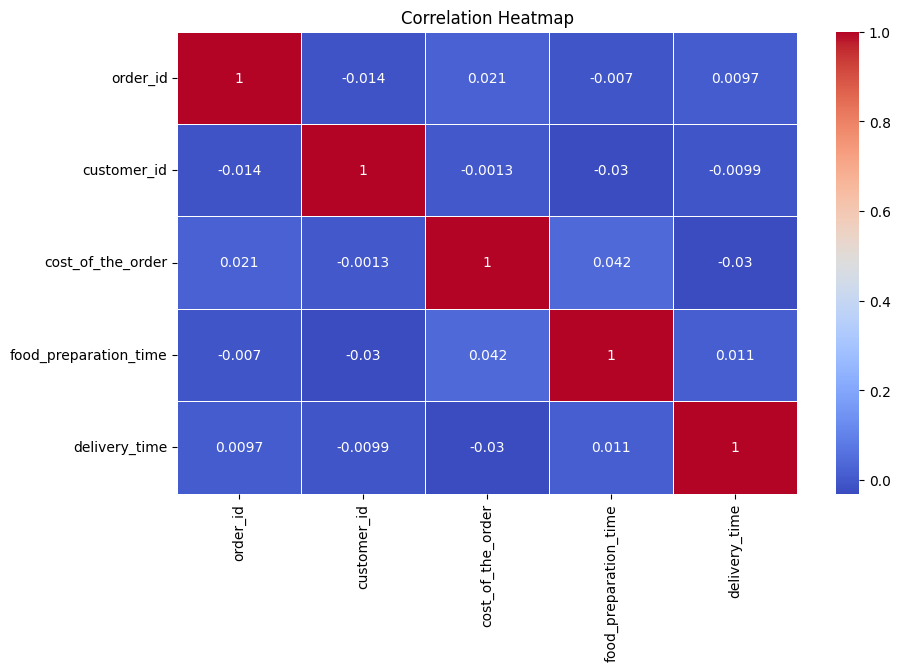

In [417]:
# Plot heatmap of food hub metrics
numeric_data = backup_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Observations: The correlation heatmap reveals predominantly small values, such as 0.011, -0.0099, and 0.0097, indicating very weak or negligible correlations between the variables analyzed in the food hub dataset.

# Box Plot of Cost of the Order by Cuisine Type

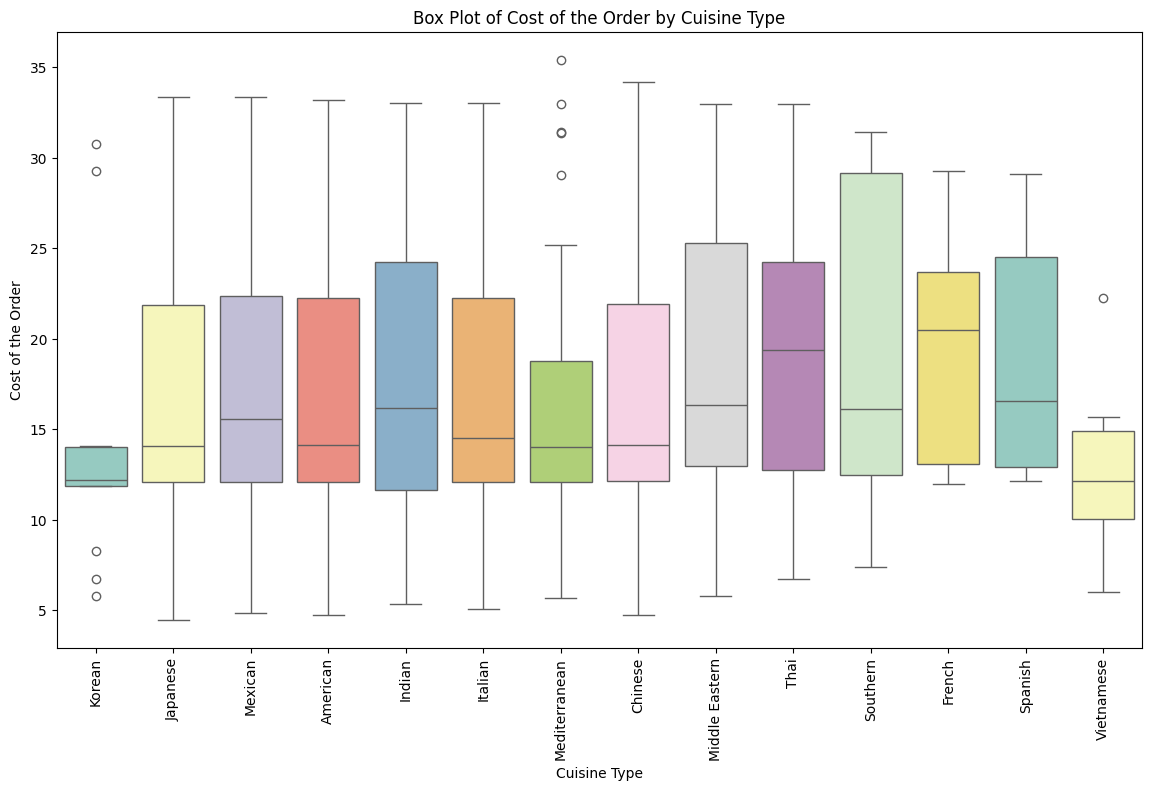

In [418]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Box Plot of Cost of the Order by Cuisine Type')
plt.show()


# Average Costs of Various Cuisine Types

In [419]:
median_costs = df.groupby('cuisine_type')['cost_of_the_order'].median()

print(median_costs)

cuisine_type
American          14.120
Chinese           14.120
French            20.470
Indian            16.150
Italian           14.480
Japanese          14.070
Korean            12.180
Mediterranean     13.995
Mexican           15.570
Middle Eastern    16.300
Southern          16.110
Spanish           16.520
Thai              19.350
Vietnamese        12.130
Name: cost_of_the_order, dtype: float64


#### Observations:

*   The median cost of orders across different cuisine types, ranging from approximately 12.13 to 20.47 dollars

*   Outliers are notably present in Korean, Mediterranean, and Vietnamese cuisines, indicating occasional significantly higher or lower order costs compared to the typical spending patterns within these cuisines.

*   cuisines such as American, Chinese, Japanese, and Italian have median costs that are mid-range, possibly reflecting their popularity and affordability compared to others like French or Thai, which show higher median costs.

# Box and violin Plot of Delivery Time by Day of the Week

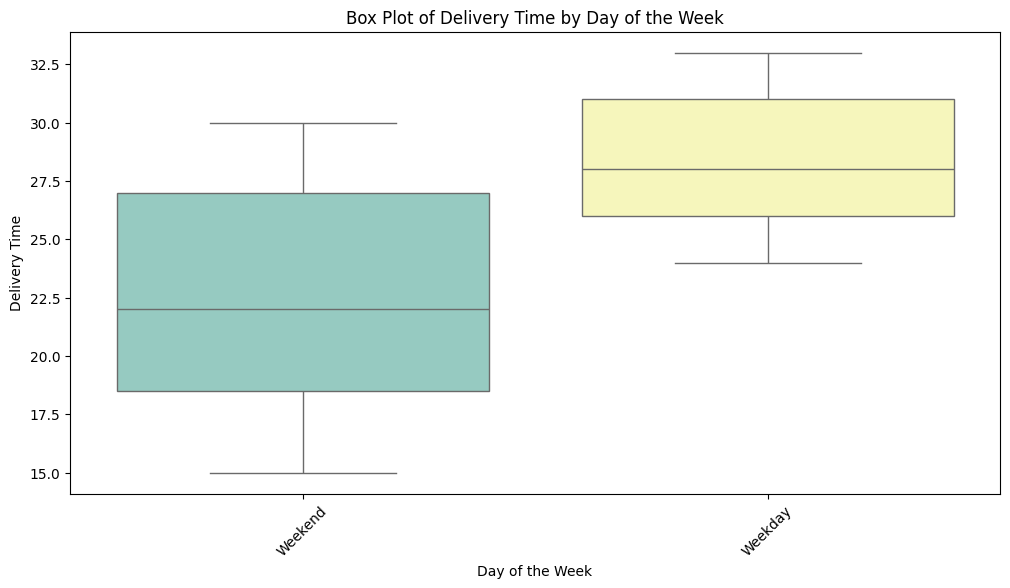

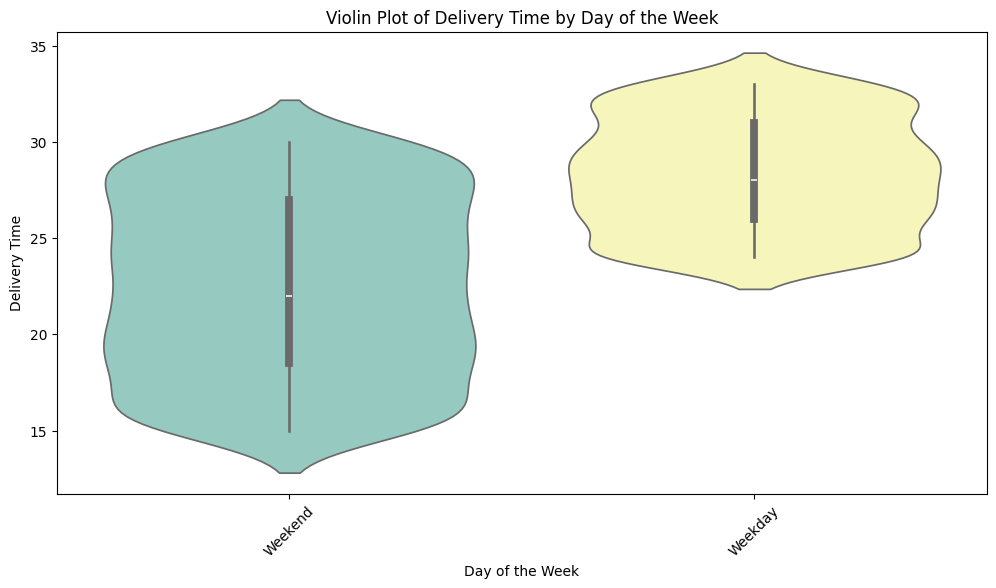

In [420]:
# Box plot of delivery time by day of the week

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Box Plot of Delivery Time by Day of the Week')
plt.show()

# Violin plot of delivery time by day of the week

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Violin Plot of Delivery Time by Day of the Week')
plt.show()

# Median and Quartiles of Orders by Day of the Week

In [421]:
summary_stats = df.groupby('day_of_the_week')['delivery_time'].describe()[['50%', '25%', '75%']]
summary_stats.reset_index(inplace=True)
print(summary_stats)

  day_of_the_week   50%   25%   75%
0         Weekday  28.0  26.0  31.0
1         Weekend  22.0  18.5  27.0


#### Observations:

*   Median (50%): Weekday deliveries have a median of 28 minutes, while weekends have a lower median of 22 minutes. This suggests that, on average, deliveries are faster on weekends compared to weekdays.

*   Q1 (25%) and Q3 (75%): The first quartile (Q1) and third quartile (Q3) values for weekdays are 26 minutes and 31 minutes, respectively, indicating a wider range of delivery times during the week. In contrast, weekends show Q1 at 18.5 minutes and Q3 at 27 minutes, indicating more consistent and slightly faster delivery times overall.


# Box Plot of Food Preparation Time by Cuisine Type

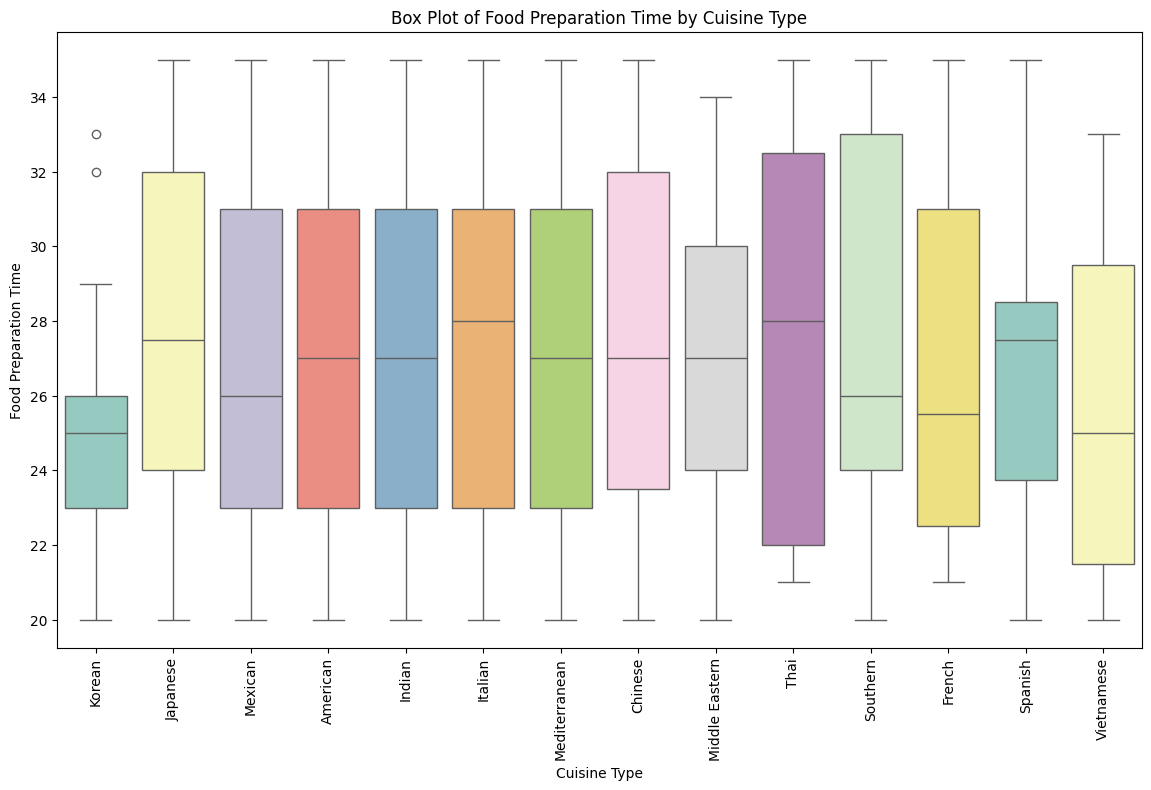

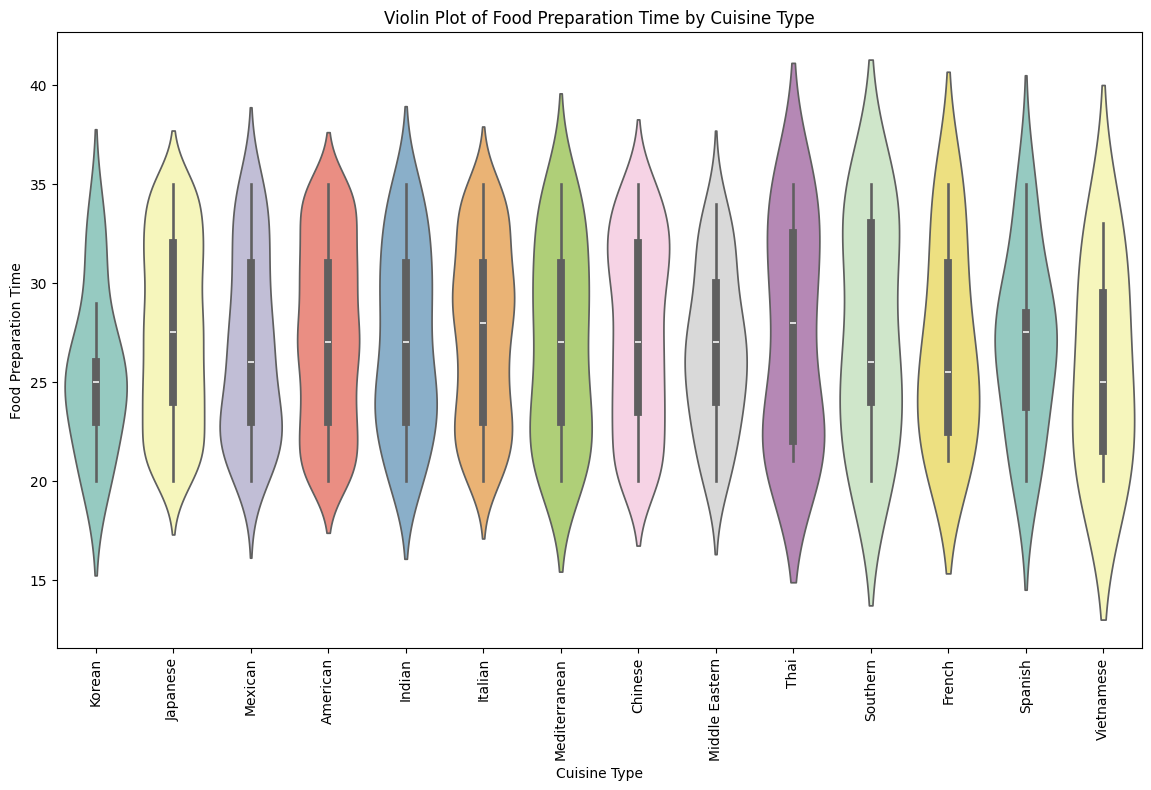

In [422]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Box Plot of Food Preparation Time by Cuisine Type')
plt.show()

# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='cuisine_type', y='food_preparation_time', palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Violin Plot of Food Preparation Time by Cuisine Type')
plt.show()

# Summary of Food Preparation Times Distribution

In [423]:
q1 = np.percentile(df['food_preparation_time'], 25)
q2 = np.percentile(df['food_preparation_time'], 50)  # Median
q3 = np.percentile(df['food_preparation_time'], 75)

print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {q2}")
print(f"Q3 (75th percentile): {q3}")


Q1 (25th percentile): 23.0
Median (50th percentile): 27.0
Q3 (75th percentile): 31.0


#### Observations:

*   The median (50th percentile) food preparation time is 27 minutes, indicating that half of the orders require less than 27 minutes of preparation across the dataset.

*   The IQR, represented by the box in the box plot, spans from the first quartile (Q1) at 23 minutes to the third quartile (Q3) at 31 minutes. This range encompasses the middle 50% of the data, highlighting typical preparation times for most orders.

*   This analysis helps understand the distribution and variability of food preparation times across different cuisine types, providing insights into operational efficiency and customer service expectations within the food service industry.

# Box Plot of Food Preparation Time by Day of the Week and Cuisine Type

<Figure size 1400x800 with 0 Axes>

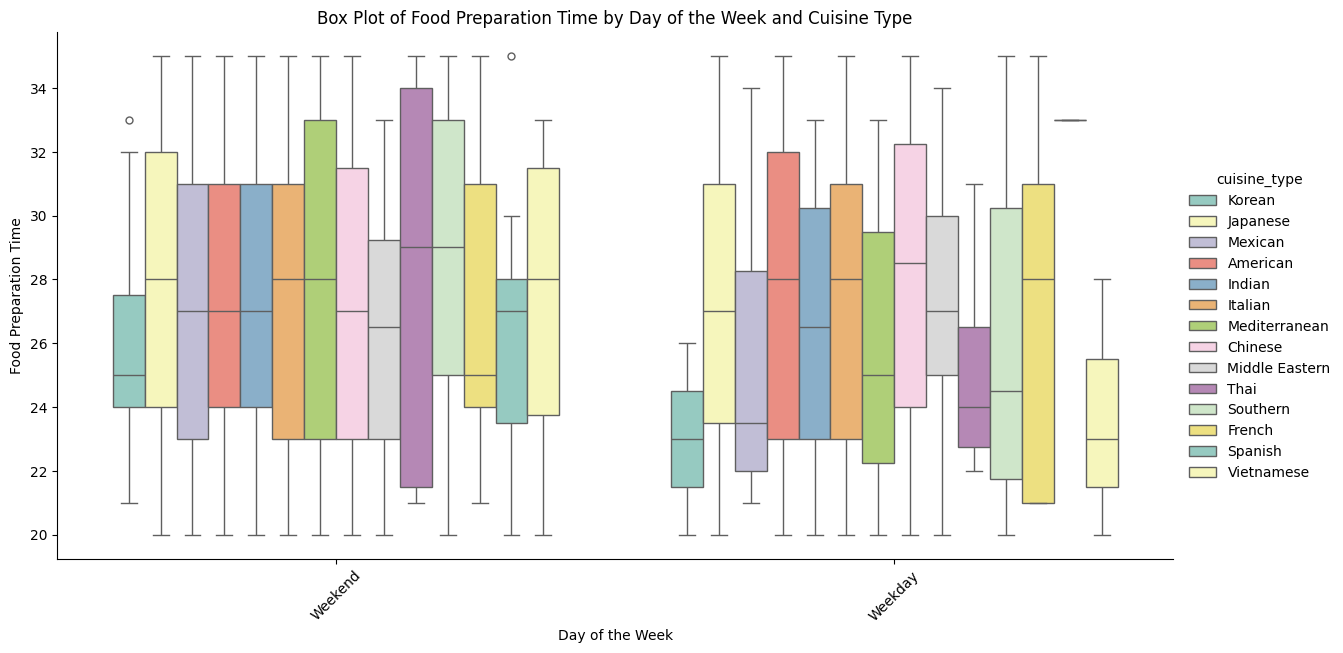

In [424]:
# Plot box plot of food preparation time on weekdays and weekends for different cusines
plt.figure(figsize=(14, 8))
sns.catplot(data=df, x='day_of_the_week', y='food_preparation_time', hue='cuisine_type', kind='box', height=6, aspect=2, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.title('Box Plot of Food Preparation Time by Day of the Week and Cuisine Type')
plt.show()

#### Observations:

*   Preparation times are slightly longer on weekends for most types of food, which may be due to higher customer demand or differences in how kitchens operate.

*   These observations show us how long it takes to prepare food for different types of cuisine on different days of the week. They help us see any patterns or unusual times that could affect how restaurants are managed.

# Boxplot of Ratings by Cuisine Type

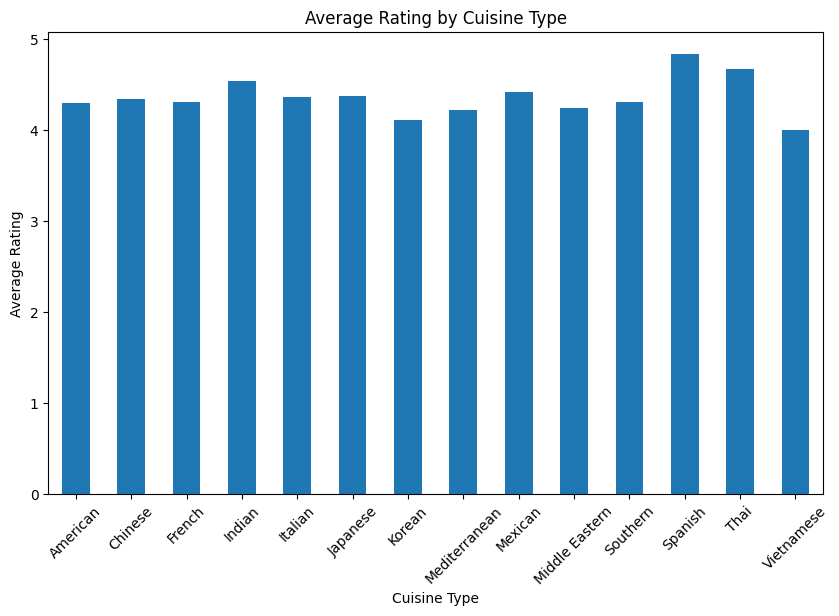

In [425]:
# Plot customer rating on cusines
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_ratings = df.groupby('cuisine_type')['rating'].mean()

plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

#### Observations: Spanish cuisine has the highest average rating of 4.83, while Vietnamese cuisine has the lowest average rating of 4.0, both based on small sample sizes.

# Scatter Plot of Food Preparation Time vs Delivery Time

Text(0.5, 1.0, 'Scatter Plot of Food Preparation Time vs Delivery Time')

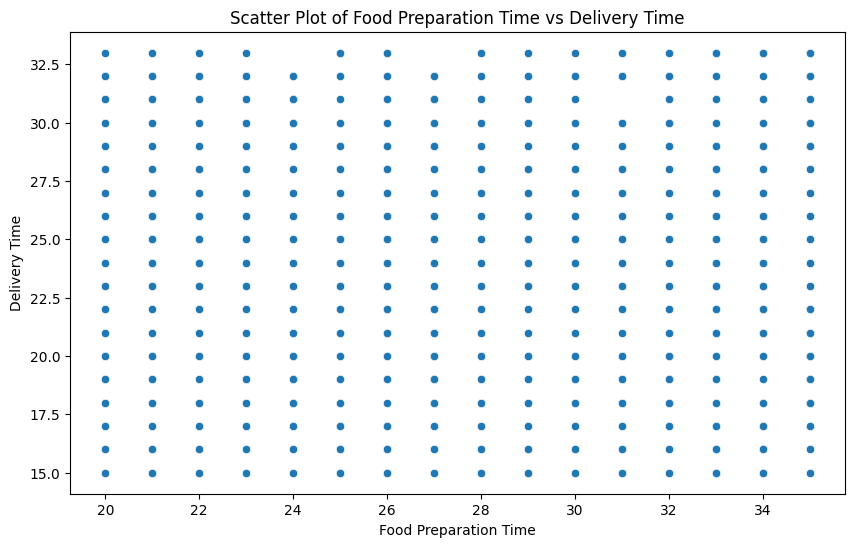

In [426]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot of Food Preparation Time vs Delivery Time')

#### Observations:


*   The scatter plot shows no clear relationship between food preparation time and delivery time.
*   Focus on optimizing the delivery process by investigating other influencing factors such as delivery distance, traffic conditions, and order volume.



# Box plot showing the distribution of order costs by cuisine type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

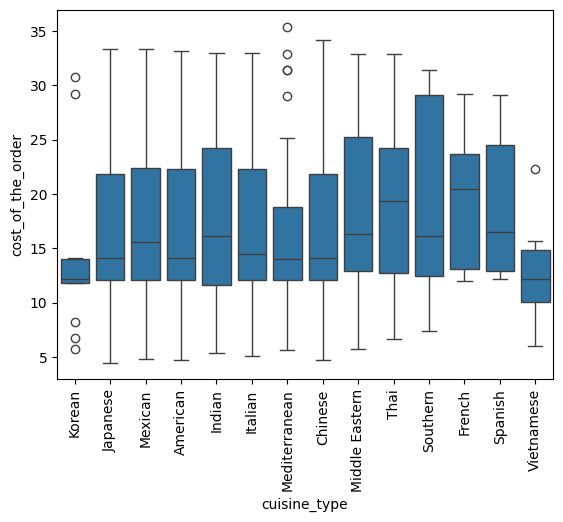

In [427]:
# Create box plot for cost of order by cusine type
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)

# Median Cost of Orders by Cuisine Type

In [428]:
# Calculate median value for the cost of the order
median_per_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].median()
median_per_cuisine_sorted = median_per_cuisine.sort_values(ascending=False)
print("Median value of cost_of_the_order per cuisine type (sorted from high to low):\n", median_per_cuisine_sorted)

Median value of cost_of_the_order per cuisine type (sorted from high to low):
 cuisine_type
French            20.470
Thai              19.350
Spanish           16.520
Middle Eastern    16.300
Indian            16.150
Southern          16.110
Mexican           15.570
Italian           14.480
American          14.120
Chinese           14.120
Japanese          14.070
Mediterranean     13.995
Korean            12.180
Vietnamese        12.130
Name: cost_of_the_order, dtype: float64


#### Observations:


*   Different cuisine types show significant variation in their median order costs, with French cuisine having the highest and Vietnamese cuisine the lowest.
*   This variation suggests that cuisine choice strongly influences customer spending habits and perception of value.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [429]:
# Top-Rated Restaurants in the Dataset
df_rating = df[df['rating'] != 'Not given']

df_rating['rating'] = df_rating['rating'].astype(float)

df_ratings_count =  df_rating.groupby('restaurant_name')['rating'].count().reset_index()
df_ratings_count.rename(columns={'rating': 'rating_count'}, inplace=True)

df_ratings_count.sort_values(by='rating_count', ascending=False, inplace=True)
df_ratings_count_g_50 = df_ratings_count[df_ratings_count['rating_count'] > 50]

df_avg_rating = df_rating.groupby('restaurant_name')['rating'].mean().reset_index()
df_avg_rating[df_avg_rating['restaurant_name'].isin(df_ratings_count_g_50['restaurant_name'])]

,restaurant_name,rating
20,Blue Ribbon Fried Chicken,4.328125
21,Blue Ribbon Sushi,4.219178
136,Shake Shack,4.278195
153,The Meatball Shop,4.511905


#### Observations:

All the listed restaurants (Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop) fulfill the criteria to receive the promotional offer:

*   Their average ratings are greater than 4.
*   They each have a rating count exceeding 50.


Therefore, all these restaurants qualify for the promotional offer based on the specified conditions of average rating and rating count.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [430]:
def calculate_revenue(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order * 0.25
  elif cost_of_the_order > 5 and cost_of_the_order <= 20:
    return cost_of_the_order * 0.15
  return 0



In [431]:
# Net revenue generated by the company across all orders
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
df['revenue'].sum()

6166.303

#### Observations: The calculated net revenue of \$6166.303 shows how much money the company made from extra charges on restaurant orders that cost more than \$20 and \$5, using different percentages based on the order's cost.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [432]:
# Percentage of orders take more than 60 minutes
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
t_rows = df['total_time'].shape[0]
df[df['total_time'] > 60].shape[0]/t_rows * 100

10.537407797681771

#### Observations: Approximately 10.537% of the orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [433]:
# Delivery time of the orders on weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_time_by_day

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: Analyzing the data shows that deliveries take longer on weekdays, averaging about 28.34 units, compared to weekends where they average around 22.47 units. This suggests that weekday traffic and demand may cause delays, highlighting the importance of planning to handle busy times and improve service.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine has the most high ratings (300), followed closely by Japanese cuisine (275), when looking at ratings of 4 or higher.

*   The boxplot shows that food preparation times usually take 27 minutes, with times ranging from 20 to 35 minutes.

*   The count plot shows that more people order food on weekends (1350 orders) than on weekdays (550 orders), likely because they have more free time on weekends.

*   Delivery times are shorter on weekends (about 22.47 units) compared to weekdays (about 28.34 units), likely due to less traffic and demand, so better strategies are needed for busy weekdays to improve service.

*   Spanish food is rated the highest with an average of 4.83, while Vietnamese food is rated the lowest with an average of 4.0, based on small sample sizes.

*   The cost of orders is between \$4.47 and \$35.41, but most orders cost more than \$14.14, showing a trend towards higher prices.

*   The data reveals that many customers frequently order items priced at \$12.18, with 86 orders at this price, making it a popular choice among customers.

*   The countplot shows that most customers give the cuisine a high rating of 5, indicating they are generally very satisfied.

### Recommendations:

*  For better menu success, promote American and Japanese dishes in ads, and work on improving the quality of Italian and Chinese dishes to make customers happier.

*   To make our customers happy and save time, we will improve our cooking methods to always prepare meals in about 20 minutes without losing quality.

*   To boost sales and run smoothly, the business should have more staff and stock on weekends to handle busy times, and offer special deals and marketing during weekdays to attract more customers.

*   Plan smart ways to handle busy times during weekdays, like having the right number of staff, better delivery routes, and faster order processing to speed up deliveries and improve service.

*   Get more customer reviews for Spanish and Vietnamese cuisines to have better data, and look into improving the Vietnamese cuisine based on what customers say.

*   Consider introducing more budget-friendly options to attract customers looking for lower-cost orders.

*   Consider offering more options or promotions around the \$12.18 price point to capitalize on its popularity and attract more customers.

*   To boost customer satisfaction, focus on improving consistency in quality and enhancing elements that elevate the dining experience, particularly addressing factors contributing to lower ratings (3)

*   Adjust pricing and promotional strategies based on cuisine type to better align with customer expectations and maximize profitability.

---